In [22]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import os
os. environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#TF_CPP_MIN_LOG_LEVEL: 텐서 플로우 로그
#0: 모든 로그 출력(default)
#1: INFO 로그 필터
#2: INFO, WARNING 로그 필터
#3: INFO, WARNING, ERROR 로그 필터

import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers

In [23]:
iris = datasets.load_iris()
# iris data 불러오기
X, y = iris.data[:100, :2], iris.target[:100]

y = 2 * y - 1

In [24]:
iris_Data = iris.data

In [25]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [26]:
def Solver_SVM (P, q, G, h, A, b):
    sol = solvers.qp(
    matrix(P),
    matrix(q),
    matrix(G),
    matrix(h),
    matrix(A, tc = "d"),
    matrix(b, tc = "d")
    )

    return(sol)

In [27]:
m = X.shape[0]
I = np.identity(m)
C = 1e6

K = X @ X.T
Y = np.diag(y)
P = Y @ K @ Y
q = q = -np.ones((m, 1))

G = np.vstack([-I, I])
h = np.hstack([np.zeros(m), C*np.ones(m)])

A = y.astype(float).reshape(1, m)
b = np.array([0.0])

In [28]:
sol = Solver_SVM(P, q, G, h, A, b)

alpha = np.array(sol['x']).reshape(-1)

     pcost       dcost       gap    pres   dres
 0:  1.0315e+12 -4.4541e+13  1e+14  5e-01  6e-08
 1:  1.8733e+12 -6.1777e+12  9e+12  2e-02  6e-06
 2:  4.7320e+11 -8.6801e+11  1e+12  1e-03  6e-07
 3:  7.3700e+10 -8.8097e+10  2e+11  3e-10  1e-08
 4:  1.0629e+10 -1.1981e+10  2e+10  1e-10  6e-09
 5:  1.5262e+09 -1.6926e+09  3e+09  1e-10  2e-09
 6:  2.1885e+08 -2.4137e+08  5e+08  3e-12  8e-10
 7:  3.1361e+07 -3.4534e+07  7e+07  4e-12  3e-10
 8:  4.4915e+06 -4.9483e+06  9e+06  3e-12  1e-10
 9:  6.4254e+05 -7.1002e+05  1e+06  4e-13  4e-11
10:  9.1656e+04 -1.0215e+05  2e+05  1e-13  2e-11
11:  1.2973e+04 -1.4799e+04  3e+04  6e-15  7e-12
12:  1.7947e+03 -2.1830e+03  4e+03  9e-14  3e-12
13:  2.2901e+02 -3.3848e+02  6e+02  4e-14  9e-13
14:  1.6468e+01 -6.1187e+01  8e+01  2e-14  4e-13
15: -8.3522e+00 -3.8430e+01  3e+01  4e-15  3e-13
16: -1.8906e+01 -4.2305e+01  2e+01  7e-16  4e-13
17: -3.3451e+01 -3.4434e+01  1e+00  1e-14  4e-13
18: -3.3792e+01 -3.3801e+01  1e-02  4e-14  4e-13
19: -3.3795e+01 -3.37

In [29]:
HP = np.where(alpha > 1e-6)[0]
HP_margin = np.where((alpha > 1e-6) & (alpha < C - 1e-6))[0]

In [30]:
y = np.asarray(y).reshape(-1)          
X = np.asarray(X, dtype=float)         
w = X[HP].T @ (alpha[HP] * y[HP])   
b = np.mean(y[HP_margin] - X[HP_margin] @ w)
print(w)
print(b)

[ 6.31578976 -5.26315768]
-17.31579154703006


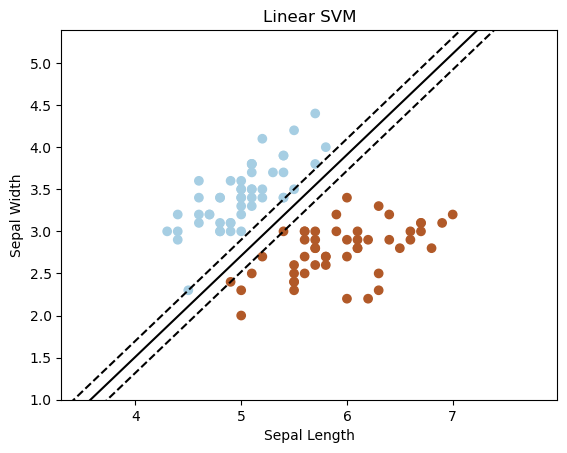

In [31]:
h = 0.01
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max() + 1
y_min, y_max = X[:, 1].min()-1 , X[:, 1].max() + 1
#데이터가 그래프에 가려지지 안도록 그래프의 크기 조절
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = np.c_[xx.ravel(), yy.ravel()]

x_axis = np.linspace(x_min, x_max, 1000)
y_axis = -(w[0] / w[1]) * x_axis - b/w[1]
margin_up = -(w[0] / w[1]) * x_axis  - ((b - 1)/w[1])
margin_down = -(w[0] / w[1]) * x_axis - ((b + 1)/w[1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.plot(x_axis, y_axis, "k-")
plt.plot(x_axis, margin_up, "k--")
plt.plot(x_axis, margin_down, "k--")

plt.title('Linear SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()